In [7]:
import pandas as pd
import numpy as np

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 9, Finished, Available, Finished)

# RULE ENhanced

In [1]:
df = spark.sql("SELECT * FROM f1_lake_db.flagged_txn_combined")
data = df.toPandas()


StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 3, Finished, Available, Finished)

In [96]:
df= data.copy()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 98, Finished, Available, Finished)

In [8]:
pd.set_option('display.max_columns', None)


StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 10, Finished, Available, Finished)

In [9]:
df.head()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 11, Finished, Available, Finished)

,TransactionId,AccountNo,Date,Time,Type,Amount,Provider,Source,Remarks,CustomerId,last_modified_date_bs,created_date,status,cash_back_amount,revenue_amount,transactor_module_id,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,Flag,Identifier,Month,Day
0,808694480,424,2023-05-24,14:29:08,1,1639.0,None,rw,None,206,2080-02-10,2023-05-24,1.0,0.0,16.39,4.0,1.0,133.0,29.0,531.0,424,0.0,True,1061,5.0,24.0
1,760028909,424,2023-03-30,14:16:25,1,2260.0,None,rw,None,206,2079-12-16,2023-03-30,1.0,0.0,22.60,4.0,1.0,133.0,29.0,531.0,424,0.0,True,1087,3.0,30.0
2,704986587,424,2023-01-21,08:36:14,1,904.0,None,rw,None,206,2079-10-07,2023-01-21,1.0,0.0,9.04,4.0,1.0,133.0,29.0,531.0,424,0.0,True,955,1.0,21.0
3,729360295,424,2023-02-21,09:16:10,1,904.0,None,rw,None,206,2079-11-09,2023-02-21,1.0,0.0,9.04,4.0,1.0,133.0,29.0,531.0,424,0.0,True,955-g,2.0,21.0
4,729152471,424,2023-02-20,19:38:26,1,4576.0,None,rw,None,206,2079-11-08,2023-02-20,1.0,0.0,45.76,4.0,1.0,133.0,29.0,531.0,424,0.0,True,1099,2.0,20.0


In [20]:
df['Flag'].value_counts()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 22, Finished, Available, Finished)

Flag
False    260065
True       9026
Name: count, dtype: int64

In [28]:
cid = df[df['CustomerId']==206]

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 30, Finished, Available, Finished)

In [22]:
cid.shape

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 24, Finished, Available, Finished)

(2519, 26)

In [23]:
cid['Identifier'].value_counts()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 25, Finished, Available, Finished)

Identifier
1052-g    4
975-g     4
1069-g    4
1070-g    4
1079-g    4
         ..
1024      1
1025      1
1026      1
1027      1
1097      1
Name: count, Length: 274, dtype: int64

In [26]:
df['Identifier'] = df['Identifier'].fillna('')

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 28, Finished, Available, Finished)

In [29]:
filtered_cid = cid[cid['Identifier'].str.endswith('-g')]


StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 31, Finished, Available, Finished)

In [30]:
filtered_cid.shape

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 32, Finished, Available, Finished)

(231, 26)

In [34]:
filtercid = filtered_cid[filtered_cid['Flag']==True]

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 36, Finished, Available, Finished)

In [35]:
filtercid['Identifier'].value_counts()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 37, Finished, Available, Finished)

Identifier
967-g     4
1079-g    4
1062-g    4
1070-g    4
1069-g    4
         ..
1011-g    1
1010-g    1
1030-g    1
1029-g    1
984-g     1
Name: count, Length: 127, dtype: int64

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 43, Finished, Available, Finished)

/tmp/ipykernel_5931/2632650564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


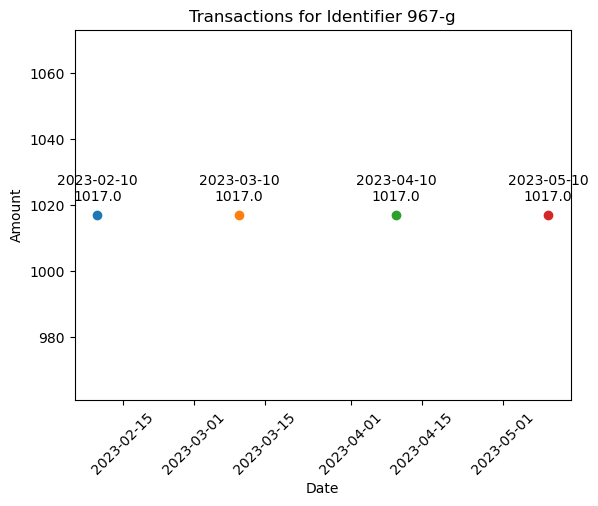

In [41]:
identifier_value = '967-g'  
filtered_df = df[df['Identifier'] == identifier_value]

filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df = filtered_df.sort_values(by='Date')

filtered_df['Month'] = filtered_df['Date'].dt.to_period('M')

fig, ax = plt.subplots()
for key, grp in filtered_df.groupby((filtered_df['Month'] != filtered_df['Month'].shift()).cumsum()):
    ax.plot(grp['Date'], grp['Amount'], marker='o')

    for idx, row in grp.iterrows():
        ax.annotate(f"{row['Date'].date()}\n{row['Amount']}", (row['Date'], row['Amount']),
                    textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title(f'Transactions for Identifier {identifier_value}')
plt.show()

In [43]:
filtercid[filtercid['Identifier']=='967-g']

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 45, Finished, Available, Finished)

,TransactionId,AccountNo,Date,Time,Type,Amount,Provider,Source,Remarks,CustomerId,last_modified_date_bs,created_date,status,cash_back_amount,revenue_amount,transactor_module_id,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,Flag,Identifier,Month,Day
309,769299840,424,2023-04-10,13:03:58,1,1017.0,None,rw,None,206,2079-12-27,2023-04-10,1.0,0.0,10.17,4.0,1.0,133.0,29.0,531.0,424,0.0,True,967-g,4.0,10.0
330,743612831,424,2023-03-10,18:45:41,1,1017.0,None,rw,None,206,2079-11-26,2023-03-10,1.0,0.0,10.17,4.0,1.0,133.0,29.0,531.0,424,0.0,True,967-g,3.0,10.0
342,796050094,424,2023-05-10,15:52:49,1,1017.0,None,rw,None,206,2080-01-27,2023-05-10,1.0,0.0,10.17,4.0,1.0,133.0,29.0,531.0,424,0.0,True,967-g,5.0,10.0
356,720559123,424,2023-02-10,10:13:29,1,1017.0,None,rw,None,206,2079-10-27,2023-02-10,1.0,0.0,10.17,4.0,1.0,133.0,29.0,531.0,424,0.0,True,967-g,2.0,10.0


In [52]:
identifier_counts = filtercid['Identifier'].value_counts()
l4 = filtercid[
    (filtercid['Identifier'].map(identifier_counts) < 4) &
    (filtercid['Identifier'].map(identifier_counts) > 1)
]


StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 54, Finished, Available, Finished)

In [53]:
l4['Identifier'].value_counts()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 55, Finished, Available, Finished)

Identifier
1074-g    3
1024-g    3
1078-g    3
1080-g    3
1075-g    3
1068-g    3
1054-g    3
1050-g    3
965-g     3
966-g     3
972-g     3
973-g     3
968-g     3
1082-g    3
997-g     3
1027-g    3
978-g     3
979-g     3
983-g     3
1028-g    3
1081-g    2
958-g     2
974-g     2
1066-g    2
1073-g    2
1076-g    2
977-g     2
1084-g    2
982-g     2
962-g     2
963-g     2
1063-g    2
970-g     2
971-g     2
960-g     2
992-g     2
1083-g    2
994-g     2
995-g     2
998-g     2
1001-g    2
1015-g    2
1016-g    2
1022-g    2
1013-g    2
1031-g    2
1032-g    2
1033-g    2
1009-g    2
1047-g    2
1039-g    2
1042-g    2
1046-g    2
1051-g    2
1055-g    2
1057-g    2
1034-g    2
1049-g    2
1048-g    2
976-g     2
Name: count, dtype: int64

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 57, Finished, Available, Finished)

/tmp/ipykernel_5931/863630844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


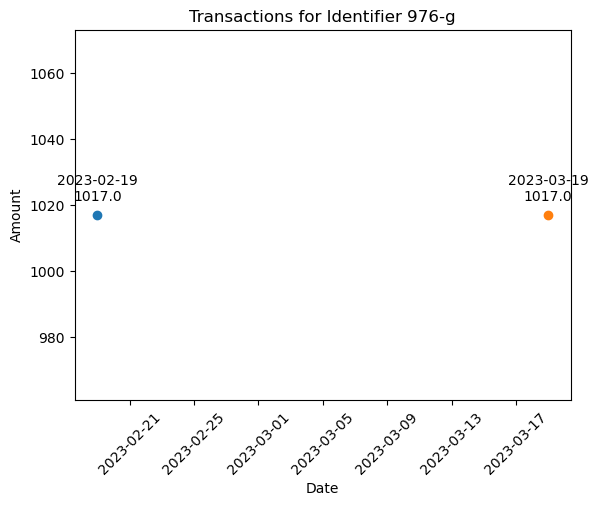

In [55]:
identifier_value = '976-g'  
filtered_df = df[df['Identifier'] == identifier_value]

filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df = filtered_df.sort_values(by='Date')

filtered_df['Month'] = filtered_df['Date'].dt.to_period('M')

fig, ax = plt.subplots()
for key, grp in filtered_df.groupby((filtered_df['Month'] != filtered_df['Month'].shift()).cumsum()):
    ax.plot(grp['Date'], grp['Amount'], marker='o')

    for idx, row in grp.iterrows():
        ax.annotate(f"{row['Date'].date()}\n{row['Amount']}", (row['Date'], row['Amount']),
                    textcoords="offset points", xytext=(0, 10), ha='center')

plt.xticks(rotation=45)

ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title(f'Transactions for Identifier {identifier_value}')
plt.show()

In [97]:
identifier_counts = df['Identifier'].value_counts()

single_occurrence_mask = df['Identifier'].isin(identifier_counts[identifier_counts == 1].index)

df.loc[single_occurrence_mask, 'Flag'] = False

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 99, Finished, Available, Finished)

In [98]:
result_df = df[df['Flag']==True]

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 100, Finished, Available, Finished)

In [99]:
result_df['Date'] = pd.to_datetime(result_df['Date'])

grouped = result_df.groupby(['CustomerId', 'Identifier']).apply(lambda x: x.sort_values('Date')).reset_index(drop=True)

def flag_records(group):
    group = group.copy()
    if len(group) == 2:
        date_diff = (group.iloc[1]['Date'] - group.iloc[0]['Date']).days
        if date_diff > 65:
            group.loc[:, 'Flag'] = False
    else:
        for i in range(len(group) - 2):
            window = group.iloc[i:i+3]
            date_diffs = (window['Date'].diff().dt.days[1:]).tolist()
            if any(diff > 65 for diff in date_diffs):
                group.iloc[i+1, group.columns.get_loc('Flag')] = False
    return group

result_df = grouped.groupby(['CustomerId', 'Identifier']).apply(flag_records).reset_index(drop=True)


StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 101, Finished, Available, Finished)

/tmp/ipykernel_5931/326974315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Date'] = pd.to_datetime(result_df['Date'])


In [58]:
result_df.shape

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 60, Finished, Available, Finished)

(269091, 26)

In [60]:
result_df[result_df['Flag']==True]

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 62, Finished, Available, Finished)

,TransactionId,AccountNo,Date,Time,Type,Amount,Provider,Source,Remarks,CustomerId,last_modified_date_bs,created_date,status,cash_back_amount,revenue_amount,transactor_module_id,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,Flag,Identifier,Month,Day
839,59945,409000493201',2017-08-04,NaN,1,50000.0,B2,Bank,FDRL/INTERNAL FUND TRANSFE,2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000493201',NaN,True,0,8.0,4.0
840,59956,409000493201',2017-08-11,NaN,1,50000.0,B2,Bank,FDRL/INTERNAL FUND TRANSFE,2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000493201',NaN,True,1,8.0,11.0
841,59973,409000493201',2017-08-16,NaN,1,50000.0,B2,Bank,FDRL/INTERNAL FUND TRANSFE,2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000493201',NaN,True,2,8.0,16.0
842,59921,409000493201',2017-06-15,NaN,1,100000.0,B2,Bank,FDRL/INTERNAL FUND TRANSFE,2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000493201',NaN,True,3,6.0,15.0
843,59926,409000493201',2017-06-28,NaN,1,100000.0,B2,Bank,FDRL/INTERNAL FUND TRANSFE,2,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000493201',NaN,True,4,6.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269086,784481071,907,2023-04-27,10:43:34,1,1000.0,None,rw,None,1632,2080-01-14,2023-04-27,1.0,39.0,0.0,4.0,1.0,30.0,29.0,531.0,907,0.0,True,4311-g,4.0,27.0
269087,710821404,907,2023-01-28,19:06:41,1,1000.0,None,rw,None,1632,2079-10-14,2023-01-28,1.0,39.0,0.0,4.0,1.0,30.0,29.0,531.0,907,0.0,True,4312,1.0,28.0
269088,758415812,907,2023-03-28,15:28:39,1,1000.0,None,rw,None,1632,2079-12-14,2023-03-28,1.0,39.0,0.0,4.0,1.0,30.0,29.0,531.0,907,0.0,True,4312-g,3.0,28.0
269089,711281420,907,2023-01-29,13:42:34,1,1000.0,None,rw,None,1632,2079-10-15,2023-01-29,1.0,39.0,0.0,4.0,1.0,30.0,29.0,531.0,907,0.0,True,4313,1.0,29.0


In [65]:
result_df['Identifier'].value_counts()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 67, Finished, Available, Finished)

Identifier
          260065
483-g         11
473-g         11
487-g         11
488-g         11
           ...  
1539           1
1538           1
1537           1
1536           1
4313-g         1
Name: count, Length: 6984, dtype: int64

In [67]:
result_df[result_df['Identifier']=='483-g'].head()

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 69, Finished, Available, Finished)

,TransactionId,AccountNo,Date,Time,Type,Amount,Provider,Source,Remarks,CustomerId,last_modified_date_bs,created_date,status,cash_back_amount,revenue_amount,transactor_module_id,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,Flag,Identifier,Month,Day
43240,55893,409000362497',2015-10-16,NaN,1,15000000.0,B3,Bank,TRF FROM Indiaforensic SERVICES,10,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000362497',NaN,True,483-g,10.0,16.0
43241,56285,409000362497',2015-11-16,NaN,1,15000000.0,B3,Bank,TRF FROM Indiaforensic SERVICES,10,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000362497',NaN,True,483-g,11.0,16.0
43242,57224,409000362497',2015-12-16,NaN,1,15000000.0,B3,Bank,None,10,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000362497',NaN,True,483-g,12.0,16.0
43243,56013,409000362497',2016-01-16,NaN,1,15000000.0,B3,Bank,TRF FROM Indiaforensic SERVICES,10,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000362497',NaN,True,483-g,1.0,16.0
43244,56895,409000362497',2016-02-16,NaN,1,15000000.0,B3,Bank,None,10,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,409000362497',NaN,True,483-g,2.0,16.0


In [103]:
grouped = result_df.groupby(['CustomerId', 'Identifier']).apply(lambda x: x.sort_values('Date')).reset_index(drop=True)

def flag_records(group):
    group = group.copy()
    if len(group) == 2:
        # If only 2 records,
        date_diff = (group.iloc[1]['Date'] - group.iloc[0]['Date']).days
        if date_diff > 65:
            group.loc[1, 'Flag'] = False
    else:
        # For more than 2 records
        for i in range(1, len(group)):
            date_diff = (group.iloc[i]['Date'] - group.iloc[i-1]['Date']).days
            if date_diff > 65:
                group.loc[i, 'Flag'] = False
    return group

result_df = grouped.groupby(['CustomerId', 'Identifier']).apply(flag_records).reset_index(drop=True)

print(result_df)

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 105, Finished, Available, Finished)

     TransactionId      AccountNo Date      Time  Type    Amount Provider  \
0            59945  409000493201'  NaT       NaN   1.0   50000.0       B2   
1            59956  409000493201'  NaT       NaN   1.0   50000.0       B2   
2            59973  409000493201'  NaT       NaN   1.0   50000.0       B2   
3            59921  409000493201'  NaT       NaN   1.0  100000.0       B2   
4            59926  409000493201'  NaT       NaN   1.0  100000.0       B2   
...            ...            ...  ...       ...   ...       ...      ...   
9221     784481071            907  NaT  10:43:34   1.0    1000.0     None   
9222     710821404            907  NaT  19:06:41   1.0    1000.0     None   
9223     758415812            907  NaT  15:28:39   1.0    1000.0     None   
9224     711281420            907  NaT  13:42:34   1.0    1000.0     None   
9225     759192704            907  NaT  14:10:19   1.0    1000.0     None   

     Source                     Remarks  CustomerId last_modified_date_bs  

In [104]:
rdf = result_df[result_df['Flag']==True]
rdf.shape

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 106, Finished, Available, Finished)

(2995, 26)

In [ ]:
rdf['Date'] = pd.to_datetime(rdf['Date'])

grouped = rdf.groupby(['CustomerId', 'Identifier']).apply(lambda x: x.sort_values('Date')).reset_index(drop=True)

identifiers = rdf['Identifier'].unique()
for identifier in identifiers:
    identifier_df = grouped[grouped['Identifier'] == identifier]

    fig, ax = plt.subplots(figsize=(12, 8))

    for customer_id, group in identifier_df.groupby('CustomerId'):
        group['MonthStart'] = group['Date'].dt.to_period('M').dt.to_timestamp()

        group['MonthDiff'] = group['MonthStart'].diff().dt.days
        breaks = group['MonthDiff'] > 35 
        prev_idx = 0
        for idx in group.index[1:]:
            if breaks[idx]:
                ax.plot(group.loc[prev_idx:idx-1, 'Date'], group.loc[prev_idx:idx-1, 'Amount'], marker='o', label=f'Cust {customer_id}')
                prev_idx = idx
        ax.plot(group.loc[prev_idx:, 'Date'], group.loc[prev_idx:, 'Amount'], marker='o', label=f'Cust {customer_id}')

        for idx, row in group.iterrows():
            ax.annotate(f"{row['Date'].date()}\n{row['Amount']}",
                        (row['Date'], row['Amount']),
                        textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xticks(rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='best')

    ax.set_xlabel('Date')
    ax.set_ylabel('Amount')
    ax.set_title(f'Transactions for Identifier {identifier} with Breaks in Data')
    plt.tight_layout()

    plt.show()

In [106]:
df[df['Identifier']=='1831-g']

StatementMeta(, 7116cbf8-7100-42a7-a336-35aacd5a3b71, 108, Finished, Available, Finished)

,TransactionId,AccountNo,Date,Time,Type,Amount,Provider,Source,Remarks,CustomerId,last_modified_date_bs,created_date,status,cash_back_amount,revenue_amount,transactor_module_id,module_id,product_id,product_type_id,payer_account_id,receiver_account_id,reward_point,Flag,Identifier,Month,Day
2054,775573159,423,2023-05-02,09:24:57,1,29.0,None,rw,None,1624,2080-01-04,2023-04-17,1.0,0.0,0.0,4.0,1.0,132.0,29.0,531.0,423,0.0,True,1831-g,4.0,17.0
2070,726279737,423,2023-05-08,10:33:56,1,29.0,None,rw,None,1624,2079-11-05,2023-02-17,1.0,0.0,0.0,4.0,1.0,132.0,29.0,531.0,423,0.0,True,1831-g,2.0,17.0
2095,749120262,423,2023-04-15,12:25:18,1,29.0,None,rw,None,1624,2079-12-03,2023-03-17,1.0,0.0,0.0,4.0,1.0,132.0,29.0,531.0,423,0.0,True,1831-g,3.0,17.0


In [ ]:
identifier_counts = df['Identifier'].value_counts()

single_occurrence_mask = df['Identifier'].isin(identifier_counts[identifier_counts == 1].index)

df.loc[single_occurrence_mask, 'Flag'] = False

rdf = df[df['Flag']==True]

grouped = result_df.groupby(['CustomerId', 'Identifier']).apply(lambda x: x.sort_values('Date')).reset_index(drop=True)

def flag_records(group):
    group = group.copy()
    if len(group) == 2:
        # If only 2 records,
        date_diff = (group.iloc[1]['Date'] - group.iloc[0]['Date']).days
        if date_diff > 65:
            group.loc[1, 'Flag'] = False
    else:
        # For more than 2 records
        for i in range(1, len(group)):
            date_diff = (group.iloc[i]['Date'] - group.iloc[i-1]['Date']).days
            if date_diff > 65:
                group.loc[i, 'Flag'] = False
    return group

result_df = grouped.groupby(['CustomerId', 'Identifier']).apply(flag_records).reset_index(drop=True)

print(result_df)

